We begin by conducting sentiment analysis using a dictionary.

In [173]:
import pandas as pd
import numpy as np

In [174]:
df = pd.read_csv('df_cleaned_X_train.csv')
df_test  = pd.read_csv('df_cleaned_X_test.csv')

df_train = pd.read_csv('df_cleaned_y_train.csv')
df_test_y = pd.read_csv('df_cleaned_y_test.csv')

In [175]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,timedelta,timedelta_numeric,timedelta_minmax
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,He Dissed A Rape Victim On National TV And Now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,39,100.0,True,False,NaN,NaN,201450,475 days 15:20:07.501000,4.109521e+07,0.193770
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,You Might Call Jacob A Man With Lipstick. Well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,62,24.8,False,False,NaN,NaN,201445,509 days 20:41:11.378000,4.405207e+07,0.242162
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,I Wouldn't Eat That If I Were You... It's Not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,40,89.0,False,False,NaN,TakePartChavez20-19a6cac618ec3d3bf0f340ae6eb3d...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"Despite What Happened At The End Of 'Titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,11,0.1,False,False,NaN,NaN,201442,530 days 16:11:53.201000,4.585031e+07,0.271592
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,Economist Takes 2 Minutes And A Whiteboard To ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,86,100.0,True,False,NaN,benefits-e403880bf5ddc759e67826b8284a9846.png,201408,765 days 15:56:15.803000,6.615338e+07,0.603870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,A scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,80,85.4,False,False,He didn't see it coming *at all.*,NaN,201512,371 days 23:27:41.504000,3.213886e+07,0.047192
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,How To Make The Most Awkward Kid Conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,15,0.0,False,False,NaN,NaN,201444,516 days 22:52:43.377000,4.466476e+07,0.252189
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,A Beautiful And Real Response To A Disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,51,8.1,False,False,It's time we all heard the truth.,NaN,201447,493 days 19:47:05.933000,4.266643e+07,0.219485
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,The Bizarre Human Tendency That Drew Us To Her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,48,32.0,False,False,"In 1987, the world was captivated by one littl...",NaN,201501,450 days 12:35:13.397000,3.892531e+07,0.158258


In [176]:
df.describe()

,id,impressions,clicks,significance,test_week,timedelta_numeric,timedelta_minmax
count,62804.000000,62804.000000,62804.000000,62804.000000,62804.000000,6.280400e+04,62804.000000
mean,77500.471355,3596.146042,53.287498,41.010356,201423.116107,5.552603e+07,0.429944
std,44200.160258,1461.289965,45.689207,39.884687,53.306474,1.590361e+07,0.260277
min,11.000000,1.000000,0.000000,0.000000,201320.000000,2.925533e+07,0.000000
25%,36621.250000,2769.000000,23.000000,2.600000,201406.000000,4.380097e+07,0.238053
50%,79026.000000,3141.000000,41.000000,25.800000,201432.000000,5.155567e+07,0.364966
75%,116134.250000,4113.000000,68.000000,87.100000,201445.000000,6.717402e+07,0.620574
max,150814.000000,36908.000000,822.000000,100.000000,201517.000000,9.035791e+07,1.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62804 entries, 0 to 62803
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    62804 non-null  int64  
 1   created_at            62804 non-null  object 
 2   updated_at            62804 non-null  object 
 3   clickability_test_id  62804 non-null  object 
 4   excerpt               56308 non-null  object 
 5   headline              62803 non-null  object 
 6   lede                  62748 non-null  object 
 7   slug                  62804 non-null  object 
 8   eyecatcher_id         62668 non-null  object 
 9   impressions           62804 non-null  int64  
 10  clicks                62804 non-null  int64  
 11  significance          62804 non-null  float64
 12  first_place           62804 non-null  bool   
 13  winner                62804 non-null  bool   
 14  share_text            10937 non-null  object 
 15  square             

Checking through the data, we see that everything appears to be in order.

We continue by importing NLTK for dictionary-based sentiment analysis. We will conduct sentiment analysis using VADER, which is a dictionary based sentiment analysis tool. Following which, we run a regression analysis on the dataset.

In [178]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn

# Download VADER lexicon and SentiWordNet
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gohjunwei/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/gohjunwei/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

We begin by using the Valence Aware Dictionary and Sentiment Reasoner (VADER) to conduct sentiment analysis on our headlines. Note that VADER automatically handles negation, takes into consideration intensity modifiers, conjunctions, as well as capitalization. We will use the VADER model 'out of the box' - no parameter changes are made.

In [179]:
# Initializing the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

In [180]:
df['headline'] = df['headline'].astype(str)
df_test['headline'] = df_test['headline'].astype(str)

In [181]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,timedelta,timedelta_numeric,timedelta_minmax
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,He Dissed A Rape Victim On National TV And Now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,39,100.0,True,False,NaN,NaN,201450,475 days 15:20:07.501000,4.109521e+07,0.193770
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,You Might Call Jacob A Man With Lipstick. Well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,62,24.8,False,False,NaN,NaN,201445,509 days 20:41:11.378000,4.405207e+07,0.242162
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,I Wouldn't Eat That If I Were You... It's Not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,40,89.0,False,False,NaN,TakePartChavez20-19a6cac618ec3d3bf0f340ae6eb3d...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"Despite What Happened At The End Of 'Titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,11,0.1,False,False,NaN,NaN,201442,530 days 16:11:53.201000,4.585031e+07,0.271592
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,Economist Takes 2 Minutes And A Whiteboard To ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,86,100.0,True,False,NaN,benefits-e403880bf5ddc759e67826b8284a9846.png,201408,765 days 15:56:15.803000,6.615338e+07,0.603870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,A scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,80,85.4,False,False,He didn't see it coming *at all.*,NaN,201512,371 days 23:27:41.504000,3.213886e+07,0.047192
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,How To Make The Most Awkward Kid Conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,15,0.0,False,False,NaN,NaN,201444,516 days 22:52:43.377000,4.466476e+07,0.252189
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,A Beautiful And Real Response To A Disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,51,8.1,False,False,It's time we all heard the truth.,NaN,201447,493 days 19:47:05.933000,4.266643e+07,0.219485
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,The Bizarre Human Tendency That Drew Us To Her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,48,32.0,False,False,"In 1987, the world was captivated by one littl...",NaN,201501,450 days 12:35:13.397000,3.892531e+07,0.158258


In [182]:
df['vader'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_test['vader'] = df_test['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [183]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,significance,first_place,winner,share_text,square,test_week,timedelta,timedelta_numeric,timedelta_minmax,vader
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,He Dissed A Rape Victim On National TV And Now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,...,100.0,True,False,NaN,NaN,201450,475 days 15:20:07.501000,4.109521e+07,0.193770,-0.9081
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,You Might Call Jacob A Man With Lipstick. Well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,...,24.8,False,False,NaN,NaN,201445,509 days 20:41:11.378000,4.405207e+07,0.242162,0.2732
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,I Wouldn't Eat That If I Were You... It's Not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,...,89.0,False,False,NaN,TakePartChavez20-19a6cac618ec3d3bf0f340ae6eb3d...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413,0.4310
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"Despite What Happened At The End Of 'Titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,...,0.1,False,False,NaN,NaN,201442,530 days 16:11:53.201000,4.585031e+07,0.271592,0.5719
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,Economist Takes 2 Minutes And A Whiteboard To ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,...,100.0,True,False,NaN,benefits-e403880bf5ddc759e67826b8284a9846.png,201408,765 days 15:56:15.803000,6.615338e+07,0.603870,0.5574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,A scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,...,85.4,False,False,He didn't see it coming *at all.*,NaN,201512,371 days 23:27:41.504000,3.213886e+07,0.047192,-0.1027
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,How To Make The Most Awkward Kid Conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,...,0.0,False,False,NaN,NaN,201444,516 days 22:52:43.377000,4.466476e+07,0.252189,-0.4188
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,A Beautiful And Real Response To A Disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,...,8.1,False,False,It's time we all heard the truth.,NaN,201447,493 days 19:47:05.933000,4.266643e+07,0.219485,0.1280
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,The Bizarre Human Tendency That Drew Us To Her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,...,32.0,False,False,"In 1987, the world was captivated by one littl...",NaN,201501,450 days 12:35:13.397000,3.892531e+07,0.158258,-0.6705


We now calculate the text complexity of the headline. We do so using textstat, and calculate the text complexity using the Flesch Reading Ease and the Flesch-Kincaid Grade Level to obtain a readability score. We also calculate the text complexity score using the Gunning-Fog score, which is the measure that Robertson et al used in their analysis. In addition, we calculate the length of each headline.

In [184]:
import textstat

df['flesch_reading'] = df['headline'].apply(lambda x: textstat.flesch_reading_ease(x))
df['flesch_kincaid'] = df['headline'].apply(lambda x: textstat.textstat.flesch_kincaid_grade(x))
df['gunning_fog'] = df['headline'].apply(lambda x: textstat.gunning_fog(x))
df['length'] = df['headline'].apply(lambda x: len(x))

df_test['flesch_reading'] = df_test['headline'].apply(lambda x: textstat.flesch_reading_ease(x))
df_test['flesch_kincaid'] = df_test['headline'].apply(lambda x: textstat.textstat.flesch_kincaid_grade(x))
df_test['gunning_fog'] = df_test['headline'].apply(lambda x: textstat.gunning_fog(x))
df_test['length'] = df_test['headline'].apply(lambda x: len(x))

In [185]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,square,test_week,timedelta,timedelta_numeric,timedelta_minmax,vader,flesch_reading,flesch_kincaid,gunning_fog,length
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,He Dissed A Rape Victim On National TV And Now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,...,NaN,201450,475 days 15:20:07.501000,4.109521e+07,0.193770,-0.9081,88.06,5.2,9.15,79
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,You Might Call Jacob A Man With Lipstick. Well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,...,NaN,201445,509 days 20:41:11.378000,4.405207e+07,0.242162,0.2732,91.07,2.0,2.28,89
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,I Wouldn't Eat That If I Were You... It's Not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,...,TakePartChavez20-19a6cac618ec3d3bf0f340ae6eb3d...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413,0.4310,97.70,1.5,3.00,78
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"Despite What Happened At The End Of 'Titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,...,NaN,201442,530 days 16:11:53.201000,4.585031e+07,0.271592,0.5719,71.14,7.6,9.15,100
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,Economist Takes 2 Minutes And A Whiteboard To ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,...,benefits-e403880bf5ddc759e67826b8284a9846.png,201408,765 days 15:56:15.803000,6.615338e+07,0.603870,0.5574,71.14,7.6,9.15,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,A scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,...,NaN,201512,371 days 23:27:41.504000,3.213886e+07,0.047192,-0.1027,72.32,5.0,8.33,93
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,How To Make The Most Awkward Kid Conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,...,NaN,201444,516 days 22:52:43.377000,4.466476e+07,0.252189,-0.4188,69.79,6.0,8.00,58
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,A Beautiful And Real Response To A Disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,...,NaN,201447,493 days 19:47:05.933000,4.266643e+07,0.219485,0.1280,41.36,10.7,11.35,77
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,The Bizarre Human Tendency That Drew Us To Her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,...,NaN,201501,450 days 12:35:13.397000,3.892531e+07,0.158258,-0.6705,55.24,9.5,13.90,95


We note that the vader, flesch_reading, and flesch_kincaid scores are all within a predefined range. We will therefore only normalize the length of the text and the Gunning Fog scores.

We will scale the length of  the text using min-max scaling.

In [186]:
max_length = max(df['length'])
min_length = min(df['length'])

max_length_test = max(df_test['length'])
min_length_test = min(df_test['length'])


df['length_minmax'] = (df['length'] - min_length) / (max_length - min_length)
df_test['length_minmax'] = (df_test['length'] - min_length_test) / (max_length_test - min_length_test)

In [187]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,test_week,timedelta,timedelta_numeric,timedelta_minmax,vader,flesch_reading,flesch_kincaid,gunning_fog,length,length_minmax
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,He Dissed A Rape Victim On National TV And Now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,...,201450,475 days 15:20:07.501000,4.109521e+07,0.193770,-0.9081,88.06,5.2,9.15,79,0.554745
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,You Might Call Jacob A Man With Lipstick. Well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,...,201445,509 days 20:41:11.378000,4.405207e+07,0.242162,0.2732,91.07,2.0,2.28,89,0.627737
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,I Wouldn't Eat That If I Were You... It's Not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413,0.4310,97.70,1.5,3.00,78,0.547445
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"Despite What Happened At The End Of 'Titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,...,201442,530 days 16:11:53.201000,4.585031e+07,0.271592,0.5719,71.14,7.6,9.15,100,0.708029
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,Economist Takes 2 Minutes And A Whiteboard To ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,...,201408,765 days 15:56:15.803000,6.615338e+07,0.603870,0.5574,71.14,7.6,9.15,99,0.700730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,A scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,...,201512,371 days 23:27:41.504000,3.213886e+07,0.047192,-0.1027,72.32,5.0,8.33,93,0.656934
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,How To Make The Most Awkward Kid Conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,...,201444,516 days 22:52:43.377000,4.466476e+07,0.252189,-0.4188,69.79,6.0,8.00,58,0.401460
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,A Beautiful And Real Response To A Disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,...,201447,493 days 19:47:05.933000,4.266643e+07,0.219485,0.1280,41.36,10.7,11.35,77,0.540146
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,The Bizarre Human Tendency That Drew Us To Her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,...,201501,450 days 12:35:13.397000,3.892531e+07,0.158258,-0.6705,55.24,9.5,13.90,95,0.671533


We will normalize the Gunning Fog scores by z-scaling them.

In [188]:
df['gunning_fog_standardized'] = (df['gunning_fog'] - df['gunning_fog'].mean()) / df['gunning_fog'].std()

df_test['gunning_fog_standardized'] = (df_test['gunning_fog'] - df_test['gunning_fog'].mean()) / df_test['gunning_fog'].std()

In [189]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,timedelta,timedelta_numeric,timedelta_minmax,vader,flesch_reading,flesch_kincaid,gunning_fog,length,length_minmax,gunning_fog_standardized
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,He Dissed A Rape Victim On National TV And Now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,...,475 days 15:20:07.501000,4.109521e+07,0.193770,-0.9081,88.06,5.2,9.15,79,0.554745,0.664763
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,You Might Call Jacob A Man With Lipstick. Well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,...,509 days 20:41:11.378000,4.405207e+07,0.242162,0.2732,91.07,2.0,2.28,89,0.627737,-1.603525
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,I Wouldn't Eat That If I Were You... It's Not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,...,740 days 14:06:55.793000,6.398682e+07,0.568413,0.4310,97.70,1.5,3.00,78,0.547445,-1.365801
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"Despite What Happened At The End Of 'Titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,...,530 days 16:11:53.201000,4.585031e+07,0.271592,0.5719,71.14,7.6,9.15,100,0.708029,0.664763
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,Economist Takes 2 Minutes And A Whiteboard To ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,...,765 days 15:56:15.803000,6.615338e+07,0.603870,0.5574,71.14,7.6,9.15,99,0.700730,0.664763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,A scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,...,371 days 23:27:41.504000,3.213886e+07,0.047192,-0.1027,72.32,5.0,8.33,93,0.656934,0.394021
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,How To Make The Most Awkward Kid Conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,...,516 days 22:52:43.377000,4.466476e+07,0.252189,-0.4188,69.79,6.0,8.00,58,0.401460,0.285064
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,A Beautiful And Real Response To A Disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,...,493 days 19:47:05.933000,4.266643e+07,0.219485,0.1280,41.36,10.7,11.35,77,0.540146,1.391144
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,The Bizarre Human Tendency That Drew Us To Her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,...,450 days 12:35:13.397000,3.892531e+07,0.158258,-0.6705,55.24,9.5,13.90,95,0.671533,2.233085


Given that flesch_reading, flesch_kincaid, and gunning_fog are all similar measures, we will only select one measure for use. In this instance, we will use the flesch_reading score in our regression analysis.

Now, we run a linear regression, leveraging Lasso to select our features.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62804 entries, 0 to 62803
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        62804 non-null  int64  
 1   created_at                62804 non-null  object 
 2   updated_at                62804 non-null  object 
 3   clickability_test_id      62804 non-null  object 
 4   excerpt                   56308 non-null  object 
 5   headline                  62804 non-null  object 
 6   lede                      62748 non-null  object 
 7   slug                      62804 non-null  object 
 8   eyecatcher_id             62668 non-null  object 
 9   impressions               62804 non-null  int64  
 10  clicks                    62804 non-null  int64  
 11  significance              62804 non-null  float64
 12  first_place               62804 non-null  bool   
 13  winner                    62804 non-null  bool   
 14  share_

In [191]:
df_test

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,timedelta,timedelta_numeric,timedelta_minmax,vader,flesch_reading,flesch_kincaid,gunning_fog,length,length_minmax,gunning_fog_standardized
0,44780,2013-06-02 05:49:17.404,2016-04-02 16:26:46.136,51aad5b15dfb9eb185001c4d,This is why Barbie is awful.,This Guy Sure Knows A Lot About Barbie. And He...,<p>Watch what happens when this guy starts tal...,this-guy-sure-knows-a-lot-about-barbie-and-he-...,5332bba21fae79f09f005455,2928,...,1035 days 10:37:28.732000,8.946225e+07,0.985341,0.3591,106.67,0.1,2.80,69,0.311475,-1.436524
1,140883,2015-02-16 15:44:58.358,2016-04-02 16:32:15.521,54e20f3a303461001a330000,"Yeah, seriously: Why IS this still a thing?",The fact that this specialty magazine is still...,"<p>Yeah, seriously: Why IS this still a thing?...",the-fact-that-this-specialty-magazine-is-still...,54e20f463034610028310000,1542,...,411 days 00:47:17.163000,3.551324e+07,0.102416,0.0000,72.16,7.2,8.90,89,0.420765,0.561872
2,70226,2013-11-11 23:36:36.286,2016-04-02 16:28:07.357,5281646ac3987bed59000688,"Kids on people who are still afraid of gays: ""...","'You Can't Be All Bossy To People.' Hear That,...",Sometimes cute little kids understand things m...,you-cant-be-all-bossy-to-people-hear-that-homo...,5332c1da1fae79f09f00f2a9,5009,...,872 days 16:51:31.071000,7.540149e+07,0.755224,0.0000,83.32,2.9,6.00,59,0.256831,-0.388185
3,99116,2014-07-01 03:27:24.037,2016-04-02 16:29:42.712,53b22a77d98e8ab30300002e,Why the Supreme Court's Hobby Lobby decision i...,Hobby Lobby Gets What It Wants And John Oliver...,<p>The Supreme Court ruled that Hobby Lobby (a...,hobby-lobby-gets-what-it-wants-and-john-oliver...,53b1ed93d98e8a6f30000014,4040,...,641 days 13:02:18.675000,5.542934e+07,0.428362,0.0258,71.14,7.6,6.80,92,0.437158,-0.126101
4,70373,2013-11-13 00:42:40.580,2016-04-02 16:28:07.771,5282c909e029d172d600f616,Things that matter. Pass 'em on.,How One Simple Youtube Video Saved Cynthia Fro...,"After watching this, I feel compelled to sign ...",how-one-simple-youtube-video-saved-cynthia-fro...,5332b73c1fae79f09f00157e,8494,...,871 days 15:45:27.191000,7.531113e+07,0.753745,0.4215,78.25,4.8,8.00,61,0.267760,0.267027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,2113,2015-01-15 15:58:26.811,2016-04-02 16:24:28.373,54b7e3a264313300124f0000,Issues that matter. Pass them on and on.,A Question All Couples Should Talk About Befor...,<p>Should men have a say when it comes to a wo...,a-question-all-couples-should-talk-about-befor...,54b69b20626463001e1b0000,3106,...,443 days 00:26:01.562000,3.827676e+07,0.147644,0.0000,92.12,3.6,5.20,68,0.306011,-0.650270
15698,94759,2014-08-14 16:57:42.132,2016-04-02 16:29:29.119,53ecd19cf1e88439e3000023,Just because you don't hear it doesn't mean it...,This Kind Of Conversation Often Happens In Pri...,<p>A TV show reminds us why we call it reprodu...,this-kind-of-conversation-often-happens-in-pri...,53e53b89220776c9b9000024,3067,...,596 days 23:31:46.987000,5.157911e+07,0.365349,0.0000,72.16,7.2,8.90,84,0.393443,0.561872
15699,68392,2013-10-30 17:14:38.853,2016-04-02 16:27:58.853,52713dd038659ab9bd0004e2,The really easy way to check and see if your H...,How To Tell If Your Idiotic Halloween Costume ...,Every year we have to go through another round...,how-to-tell-if-your-idiotic-halloween-costume-...,5332c1631fae79f09f00e5cc,6686,...,884 days 23:13:20,7.646120e+07,0.772567,-0.7964,58.28,8.4,11.35,73,0.333333,1.364507
15700,51494,2014-09-30 00:29:35.408,2016-04-02 16:27:05.068,5429e938aba7703bc4000066,Things that matter. Pass 'em on.,One Guy's Specific Thoughts About Bisexuality,<p>One man articulately explains what bisexual...,one-guys-specific-thoughts-about-bisexuality-m...,54288905389e1ccd0c000029,7115,...,550 days 15:57:29.660000,4.757745e+07,0.299858,0.0000,14.63,12.7,15.73,45,0.180328,2.799421


In [192]:
X_train = df[['timedelta_minmax', 'vader', 'flesch_reading', 'length_minmax']]
X_test = df_test[['timedelta_minmax', 'vader', 'flesch_reading', 'length_minmax']]

y_train = df_train
y_test = df_test_y

We determine the significance of each variable

In [193]:
import statsmodels.api as sm

# Add a constant to the features
X_train_with_constant = sm.add_constant(X_train)

# Fit an ordinary least squares regression model
model = sm.OLS(y_train, X_train_with_constant)
results = model.fit()

# Print the summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3544.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:04:37   Log-Likelihood:             1.9288e+05
No. Observations:               62804   AIC:                        -3.857e+05
Df Residuals:                   62799   BIC:                        -3.857e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0002      0.000  

Here, we see that all coefficients are significant at 15% LOS. the regression model has a relatively poor R2 value. In other words, we are unable to accurately predict the CTRs based on existing finegrained sentiment data.

We now attempt to run a logistic regression. We begin by scaling our input features.

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df[['timedelta_numeric', 'vader', 'flesch_reading', 'length']])
X_test_scaled = scaler.fit_transform(df_test[['timedelta_numeric', 'vader', 'flesch_reading', 'length']])

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

In [195]:
epsilon = 1e-6
y_train['CTR_adj'] = y_train['CTR'].apply(lambda x: np.clip(x, epsilon, 1 - epsilon))
y_train['CTR_logit'] = np.log(y_train['CTR_adj'] / (1 - y_train['CTR_adj']))

y_test['CTR_adj'] = y_test['CTR'].apply(lambda x: np.clip(x, epsilon, 1 - epsilon))
y_test['CTR_logit'] = np.log(y_test['CTR_adj'] / (1 - y_test['CTR_adj']))

In [196]:
y_train

,CTR,CTR_adj,CTR_logit
0,0.012944,0.012944,-4.334101
1,0.019981,0.019981,-3.892807
2,0.017913,0.017913,-4.004146
3,0.003479,0.003479,-5.657580
4,0.023433,0.023433,-3.729887
...,...,...,...
62799,0.037771,0.037771,-3.237698
62800,0.003875,0.003875,-5.549335
62801,0.017085,0.017085,-4.052296
62802,0.016725,0.016725,-4.074000


We note, once again, that the R^2 fit values are extremely poor. Given the complexities involved, we propose that we simplify our analysis. Instead of predicting the actual CTR, we now see if for some headline, a predicted CTR Is likely to be above or below median.

We define a high CTR as one that exists above the 50th percentile of all CTRs, a low CTR to be one that exists below the 50 percentile of all CTRs.

In [197]:
ctr_all = pd.concat([y_test, y_train], ignore_index = True)
ctr_all

,CTR,CTR_adj,CTR_logit
0,0.013320,0.013320,-4.305104
1,0.003891,0.003891,-5.545177
2,0.016570,0.016570,-4.083442
3,0.016832,0.016832,-4.067517
4,0.008477,0.008477,-4.761936
...,...,...,...
78501,0.037771,0.037771,-3.237698
78502,0.003875,0.003875,-5.549335
78503,0.017085,0.017085,-4.052296
78504,0.016725,0.016725,-4.074000


In [198]:
median = ctr_all['CTR'].median()

Instead of running a regression, we attempt to use a classification algorithm to determine if we are able to predict for a given headline of a certain sentiment, if the CTR is likely to be above or below median.

In [199]:
y_test['above_median'] = np.where(y_test['CTR'] > median, 1, 0)
y_train['above_median'] = np.where(y_train['CTR'] > median, 1, 0)

In [200]:
y_test

,CTR,CTR_adj,CTR_logit,above_median
0,0.013320,0.013320,-4.305104,1
1,0.003891,0.003891,-5.545177,0
2,0.016570,0.016570,-4.083442,1
3,0.016832,0.016832,-4.067517,1
4,0.008477,0.008477,-4.761936,0
...,...,...,...,...
15697,0.012878,0.012878,-4.339250,1
15698,0.009782,0.009782,-4.617428,0
15699,0.022435,0.022435,-3.774445,1
15700,0.007168,0.007168,-4.930941,0


We begin by using a simple decision tree classifier.

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier()

classifier.fit(X_train_scaled, y_train['above_median'])

y_pred = classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test['above_median'], y_pred)

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [202]:
accuracy

0.6219589861164183

Interestingly, we are able to obtain an accuracy score in excess of 0.5 (null accuracy). We aim to improve the accuracy score by incorporating additional variables. We will continue our project with a simplified scope.

In [203]:
X_train_scaled = scaler.fit_transform(df[['timedelta_numeric', 'vader', 'flesch_reading', 'gunning_fog', 'length']])
X_test_scaled = scaler.fit_transform(df_test[['timedelta_numeric', 'vader', 'flesch_reading', 'gunning_fog', 'length']])

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

In [204]:
classifier.fit(X_train_scaled, y_train['above_median'])

y_pred = classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test['above_median'], y_pred)


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [205]:
accuracy

0.630747675455356

We note that the addition of the gunning_fog complexity score does not significantly improve the accuracy score. We continue our analysis using our existing featureset:

'timedelta_numeric', 'vader', 'flesch_reading', 'length'

In order to improve the classification accuracy, we attempt to implement a gradient boosted tree.

In [206]:
from sklearn.ensemble import GradientBoostingClassifier

X_train_scaled = scaler.fit_transform(df[['timedelta_numeric', 'vader', 'flesch_reading', 'length']])
X_test_scaled = scaler.fit_transform(df_test[['timedelta_numeric', 'vader', 'flesch_reading', 'length']])

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

In [207]:
gb_clf.fit(X_train_scaled, y_train['above_median'])

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


GradientBoostingClassifier(random_state=42)

In [208]:
y_pred = gb_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test['above_median'], y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.66


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Here, we improve the model accuracy of gradient boosted trees to 66%.

We now attempt to finetune our model accuracy by leveraging XGBoost.

In [209]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 15)
}

accuracies = []

xgb_clf = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=25, cv=3, scoring='accuracy', verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train['above_median'])

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.19727005942368125, max_depth=13, n_estimators=171; total time=   1.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.19727005942368125, max_depth=13, n_estimators=171; total time=   1.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.19727005942368125, max_depth=13, n_estimators=171; total time=   1.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3093292420985183, max_depth=9, n_estimators=221; total time=   0.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3093292420985183, max_depth=9, n_estimators=221; total time=   1.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3093292420985183, max_depth=9, n_estimators=221; total time=   0.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.08799726016810132, max_depth=13, n_estimators=558; total time=   3.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.08799726016810132, max_depth=13, n_estimators=558; total time=   3.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.08799726016810132, max_depth=13, n_estimators=558; total time=   4.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4430880728874676, max_depth=6, n_estimators=971; total time=   2.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4430880728874676, max_depth=6, n_estimators=971; total time=   2.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4430880728874676, max_depth=6, n_estimators=971; total time=   2.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.36403628889802275, max_depth=8, n_estimators=408; total time=   1.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.36403628889802275, max_depth=8, n_estimators=408; total time=   1.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.36403628889802275, max_depth=8, n_estimators=408; total time=   1.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.49495492608099717, max_depth=14, n_estimators=513; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.49495492608099717, max_depth=14, n_estimators=513; total time=   3.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.49495492608099717, max_depth=14, n_estimators=513; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11616955533913807, max_depth=14, n_estimators=376; total time=   2.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11616955533913807, max_depth=14, n_estimators=376; total time=   2.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11616955533913807, max_depth=14, n_estimators=376; total time=   2.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3187407548138583, max_depth=12, n_estimators=121; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3187407548138583, max_depth=12, n_estimators=121; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3187407548138583, max_depth=12, n_estimators=121; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.013533152609858703, max_depth=11, n_estimators=660; total time=   3.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.013533152609858703, max_depth=11, n_estimators=660; total time=   3.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.013533152609858703, max_depth=11, n_estimators=660; total time=   3.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2723873301291946, max_depth=12, n_estimators=575; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2723873301291946, max_depth=12, n_estimators=575; total time=   3.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2723873301291946, max_depth=12, n_estimators=575; total time=   2.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4968777594207296, max_depth=5, n_estimators=975; total time=   2.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4968777594207296, max_depth=5, n_estimators=975; total time=   1.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4968777594207296, max_depth=5, n_estimators=975; total time=   1.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2671172192068058, max_depth=11, n_estimators=230; total time=   1.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2671172192068058, max_depth=11, n_estimators=230; total time=   1.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2671172192068058, max_depth=11, n_estimators=230; total time=   1.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4399702033681603, max_depth=9, n_estimators=120; total time=   0.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4399702033681603, max_depth=9, n_estimators=120; total time=   0.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4399702033681603, max_depth=9, n_estimators=120; total time=   0.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2352496259847715, max_depth=4, n_estimators=487; total time=   0.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2352496259847715, max_depth=4, n_estimators=487; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2352496259847715, max_depth=4, n_estimators=487; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4811008778424264, max_depth=4, n_estimators=876; total time=   1.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4811008778424264, max_depth=4, n_estimators=876; total time=   1.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4811008778424264, max_depth=4, n_estimators=876; total time=   1.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.0179831261101071, max_depth=4, n_estimators=439; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.0179831261101071, max_depth=4, n_estimators=439; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.0179831261101071, max_depth=4, n_estimators=439; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.13051273301300587, max_depth=14, n_estimators=554; total time=   3.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.13051273301300587, max_depth=14, n_estimators=554; total time=   3.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.13051273301300587, max_depth=14, n_estimators=554; total time=   3.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.31499832889131046, max_depth=10, n_estimators=134; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.31499832889131046, max_depth=10, n_estimators=134; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.31499832889131046, max_depth=10, n_estimators=134; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.46466020103939104, max_depth=6, n_estimators=661; total time=   1.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.46466020103939104, max_depth=6, n_estimators=661; total time=   2.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.46466020103939104, max_depth=6, n_estimators=661; total time=   1.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.341261142176991, max_depth=4, n_estimators=489; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.341261142176991, max_depth=4, n_estimators=489; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.341261142176991, max_depth=4, n_estimators=489; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11397083143409441, max_depth=6, n_estimators=921; total time=   2.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11397083143409441, max_depth=6, n_estimators=921; total time=   2.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11397083143409441, max_depth=6, n_estimators=921; total time=   2.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.025656646227779294, max_depth=4, n_estimators=829; total time=   1.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.025656646227779294, max_depth=4, n_estimators=829; total time=   1.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.025656646227779294, max_depth=4, n_estimators=829; total time=   1.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.23487706668488284, max_depth=12, n_estimators=369; total time=   1.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.23487706668488284, max_depth=12, n_estimators=369; total time=   1.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.23487706668488284, max_depth=12, n_estimators=369; total time=   2.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.37363599792821045, max_depth=10, n_estimators=561; total time=   2.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.37363599792821045, max_depth=10, n_estimators=561; total time=   2.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.37363599792821045, max_depth=10, n_estimators=561; total time=   2.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.1079914312095726, max_depth=11, n_estimators=801; total time=   3.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.1079914312095726, max_depth=11, n_estimators=801; total time=   3.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.1079914312095726, max_depth=11, n_estimators=801; total time=   3.7s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=25,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28daccbd0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28c75b010>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x288557790>},
                   random_state=42, scoring='accuracy', verbose=2)

In [210]:
random_search.best_params_

{'learning_rate': 0.08799726016810132, 'max_depth': 13, 'n_estimators': 558}

In [211]:
best_tree_model = random_search.best_estimator_
y_pred = best_tree_model.predict(X_test_scaled)

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy:", accuracy_score(y_test['above_median'], y_pred))
print("Precision:", precision_score(y_test['above_median'], y_pred))
print("Recall:", recall_score(y_test['above_median'], y_pred))
print("F1 Score:", f1_score(y_test['above_median'], y_pred))
print(classification_report(y_test['above_median'], y_pred))

Accuracy: 0.6873646669214113
Precision: 0.7229740239539586
Recall: 0.5977366255144033
F1 Score: 0.6544174586413235
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      7926
           1       0.72      0.60      0.65      7776

    accuracy                           0.69     15702
   macro avg       0.69      0.69      0.68     15702
weighted avg       0.69      0.69      0.68     15702



/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


We have a GBT with an accuracy score of 69%, which is a statistically significant improvement over the base case.

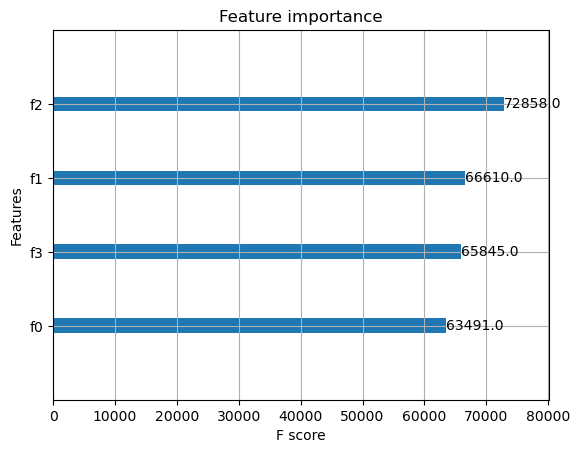

In [214]:
import matplotlib.pyplot as plt
xgb.plot_importance(best_tree_model)
plt.show()

We now attempt to run a logistic regression on the dataset as an alternative classification method.

In [213]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV()
log_reg.fit(X_train_scaled, y_train['above_median'])

y_pred = log_reg.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test['above_median'], y_pred))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test['above_median'], y_pred))

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Accuracy: 0.6529104572665902
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      7926
           1       0.66      0.60      0.63      7776

    accuracy                           0.65     15702
   macro avg       0.65      0.65      0.65     15702
weighted avg       0.65      0.65      0.65     15702



/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


We see that a Logistic Regression provides us with a classification accuracy that slightly pales in comparison to a GBT approach.